# Example using mercury 

pip install mercury 

and from the directory of the notebooks:

run mercury 8088 

and open http://127.0.0.1:8088/ 
You should see a landing page. 



In [22]:
import mercury as mr


# set Application parameters
app = mr.App(title="TropiDash - Code4Earth 2023",
        description="",
        show_code=False,
        show_prompt=False,
        continuous_update=True,
        static_notebook=False,
        show_sidebar=True,
        full_screen=True,
        allow_download=True)


mercury.App

In [23]:
from Magics import macro as magics
def plot(date, step, layer):
    area = magics.mmap(
    subpage_lower_left_latitude = 0,
    subpage_lower_left_longitude = -120,
    subpage_upper_right_latitude = 50,
    subpage_upper_right_longitude = -40,
)

    coastlines = magics.mcoast(
        map_coastline_land_shade= True,
        map_coastline_land_shade_colour = '#efefef',
        map_grid_line_style = "dot"
        )

    
    data = magics.mgrib(grib_input_file_name = f"data/{layer}-{date}.grib", 
                          grib_field_position = step)
    
    contour = magics.mcont(contour_automatic_setting = "ecmwf", legend= True)
    
    title = magics.mtext()
    legend = magics.mlegend()
    return magics.plot(area, coastlines, data, contour, magics.mcoast(), legend, title)

mercury.Select

mercury.Select

mercury.Select

Selected values are 20220925
Selected step are 1
Selected layers are tp6
Plotting data/tp6-20220925.grib at step 1


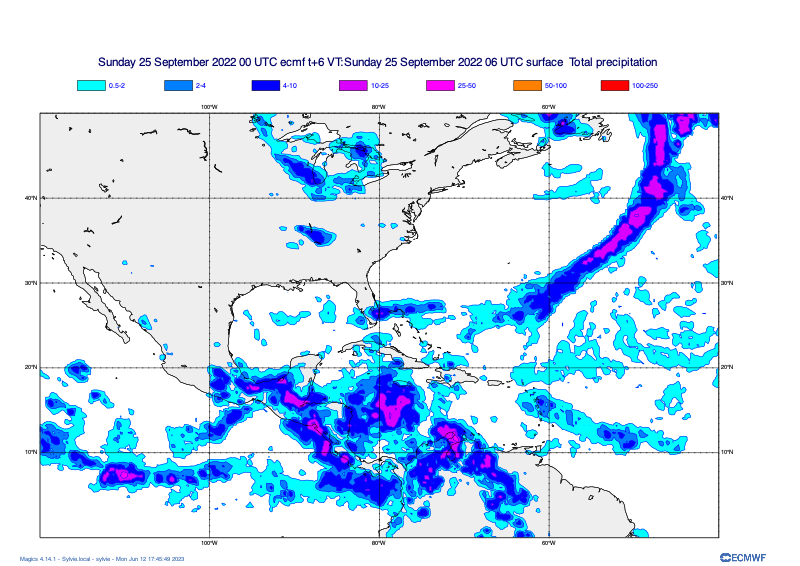

In [21]:
forecast = mr.Select(choices=[i for i  in range(20220925, 20220929)], label="Forecast")

steps = {}
pos = 1
for i in range(6,150, 6):
    steps[f"T+{i}h"]= pos
    pos = pos+1
    
step = mr.Select(choices=list(steps.keys()), label="Step")    
    
layers = {
        "Accumulated preciptation over 6h": "tp6",
        "Wind gust at 10m": "10fg6",
        "Mean sea level pressure": "mslp",
        "Sea surface temperature":"sst"
}

layer = mr.Select(choices=list(layers.keys()), label="Step")    


plot(forecast.value, steps[step.value], layers[layer.value])